In [38]:
#用前一次功課的爬蟲爬出我要的資料
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import json

#我要的網頁
url = 'https://www.ptt.cc/bbs/Boy-Girl/M.1668436949.A.EBD.html'
headers = {
      "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36",
}
headers = {"Referer":url}
r1 = requests.get(url,headers=headers)

soup = BeautifulSoup(r1.text,'lxml')
articleContent1 = soup.find_all('div',"push")
comment=[]
for item in articleContent1:
    c1= item.find('span','f3 push-content').text.strip()
    comment.append(c1)
df = pd.DataFrame(comment)
df

,0
0,: 要她就接受她的一切 哪有啥建議
1,: 不在意的方法就是抽離感情，但辦的到嗎？
2,: 超過之前的任何進度囉~~趕快懷孕然後結婚
3,: 這種之前完全靠天性擇偶的女生不是很危險嗎？ 會不會很容
4,: 易給貝塔男友戴綠帽？
...,...
634,: 不是渣男一直渣 是她眼睛一直瞎
635,: 前男友根本就是個路人，講得話也要這麼往心裡去嗎？
636,: 各方面都好實屬難得就好好相處，管路人吃不到葡萄大
637,: 酸特酸


In [39]:
import jieba #幫助判斷中文斷句的套件
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [40]:
# 確認 Jieba 功能
documents = ['而我是一隻魚我不能夠喜歡你就讓我游來游去然後把你忘記']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

而/我/是/一隻魚/我/不能/夠/喜歡/你/就/讓/我/游來游去/然後/把/你/忘記


In [41]:
jieba.load_userdict('./userdict.txt')#自己定義的句子

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

而/我/是/一隻魚/我/不能/夠/喜歡/你/就/讓/我/游來游去/然後/把/你/忘記


In [42]:
df['seg'] = " "

In [43]:
jieba.analyse.set_stop_words('stopwords.txt')#刪掉沒有意義的字詞
index = 0
for documents in df[0]:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    df['seg'].iloc[index] = seg_list
    index += 1

In [44]:
df['seg']

0                               [建議, 接受, 一切]
1                          [抽離, 不在意, 感情, 方法]
2               [超過, 進度, 趕快, 懷孕, 結婚, 之前, 任何]
3      [這種, 擇偶, 危險, 會不會, 很容, 天性, 女生, 之前, 完全]
4                          [易給, 貝塔, 戴綠帽, 男友]
                       ...                  
634                                 [一直, 眼睛]
635              [前男友, 個路, 講得, 這麼, 心裡, 根本就是]
636         [實屬, 難得, 相處, 管路, 葡萄, 好好, 不到, 方面]
637                                    [酸特酸]
638                             [飯票, 甚麼, 認為]
Name: seg, Length: 639, dtype: object

In [45]:
df_seg_list = df['seg'].tolist()
df_seg_list

[['建議', '接受', '一切'],
 ['抽離', '不在意', '感情', '方法'],
 ['超過', '進度', '趕快', '懷孕', '結婚', '之前', '任何'],
 ['這種', '擇偶', '危險', '會不會', '很容', '天性', '女生', '之前', '完全'],
 ['易給', '貝塔', '戴綠帽', '男友'],
 ['愛他', '過去'],
 ['問題', '也罷', '不要'],
 ['受不了', '不然', '更好', '不到'],
 ['記憶', '是種', '下一個', '負責抹平', '傷害', '決心'],
 ['那女', '現在', '一個', '這麼', '什麼', '遇到', '只是'],
 ['男人'],
 ['那麼', '很難', '百依百順', '無微', '試試', '介意', '男方', '女方'],
 ['愛就', 'men', '一點', '真的'],
 ['緊放人', '耽誤', '男生', '在意', '自由', '人家'],
 ['分手', '只能'],
 ['無解', '做什麼', '無濟', '最後結', '局還', '男方', '女方', '在意'],
 ['浪費', '時間', '分手', '不要'],
 ['無解', '這裡', '沒人能', '幫到', '在意'],
 ['平權', '男女'],
 ['實話', '問題', '這種', '不正', '政治', '很大', '自己'],
 ['經驗', '很亂', '機率', '百依百順', '女生'],
 ['過去', '沒有', '那有', '遇到', '以前', '那些', '可能'],
 ['當然', '這女', '不會', '主動講', '肯定', '自己'],
 ['女生', '過去', '我建議', '角度', '不要', '方面'],
 ['是還', '不太懂', '無法', '的點', '感覺', '接受', '女生', '自己', '可以'],
 ['識人', '不清', '以前'],
 ['所謂', '疑心生暗鬼', '道理'],
 ['過不去', '在意', '交往', '事情', '不要'],
 ['阿法', '一時', '一世'],
 ['打不過', '加入'],
 ['不會', '遇到', '潔

In [46]:
flat = [x for sublist in df_seg_list for x in sublist]
diction = Counter(flat)

In [47]:
diction.keys()

dict_keys(['建議', '接受', '一切', '抽離', '不在意', '感情', '方法', '超過', '進度', '趕快', '懷孕', '結婚', '之前', '任何', '這種', '擇偶', '危險', '會不會', '很容', '天性', '女生', '完全', '易給', '貝塔', '戴綠帽', '男友', '愛他', '過去', '問題', '也罷', '不要', '受不了', '不然', '更好', '不到', '記憶', '是種', '下一個', '負責抹平', '傷害', '決心', '那女', '現在', '一個', '這麼', '什麼', '遇到', '只是', '男人', '那麼', '很難', '百依百順', '無微', '試試', '介意', '男方', '女方', '愛就', 'men', '一點', '真的', '緊放人', '耽誤', '男生', '在意', '自由', '人家', '分手', '只能', '無解', '做什麼', '無濟', '最後結', '局還', '浪費', '時間', '這裡', '沒人能', '幫到', '平權', '男女', '實話', '不正', '政治', '很大', '自己', '經驗', '很亂', '機率', '沒有', '那有', '以前', '那些', '可能', '當然', '這女', '不會', '主動講', '肯定', '我建議', '角度', '方面', '是還', '不太懂', '無法', '的點', '感覺', '可以', '識人', '不清', '所謂', '疑心生暗鬼', '道理', '過不去', '交往', '事情', '阿法', '一時', '一世', '打不過', '加入', '潔身', '自愛的', '女人', '辦法', '以為', '就別', '一起', '還以', '發文', '應該', '本質', '老公', '思考', '覺得', '欺負', '可憐', '還是', '殘缺', '不檢點', '擔心', '未來', '相處', '給我', '他絕', '答案', '那樣', '且過', '改變', '實質', '影響', '虧的點', '不孕', '容易', '這個', '要用', '理由', '那要', '改善', '有效', '前男友

In [48]:
diction

Counter({'建議': 9,
         '接受': 15,
         '一切': 5,
         '抽離': 1,
         '不在意': 11,
         '感情': 9,
         '方法': 3,
         '超過': 1,
         '進度': 1,
         '趕快': 1,
         '懷孕': 5,
         '結婚': 5,
         '之前': 6,
         '任何': 2,
         '這種': 18,
         '擇偶': 1,
         '危險': 1,
         '會不會': 2,
         '很容': 1,
         '天性': 1,
         '女生': 58,
         '完全': 3,
         '易給': 1,
         '貝塔': 1,
         '戴綠帽': 1,
         '男友': 18,
         '愛他': 1,
         '過去': 21,
         '問題': 21,
         '也罷': 1,
         '不要': 24,
         '受不了': 2,
         '不然': 22,
         '更好': 3,
         '不到': 5,
         '記憶': 1,
         '是種': 1,
         '下一個': 2,
         '負責抹平': 1,
         '傷害': 3,
         '決心': 1,
         '那女': 2,
         '現在': 17,
         '一個': 20,
         '這麼': 12,
         '什麼': 22,
         '遇到': 20,
         '只是': 13,
         '男人': 9,
         '那麼': 16,
         '很難': 6,
         '百依百順': 2,
         '無微': 1,
         '試試': 2,
   

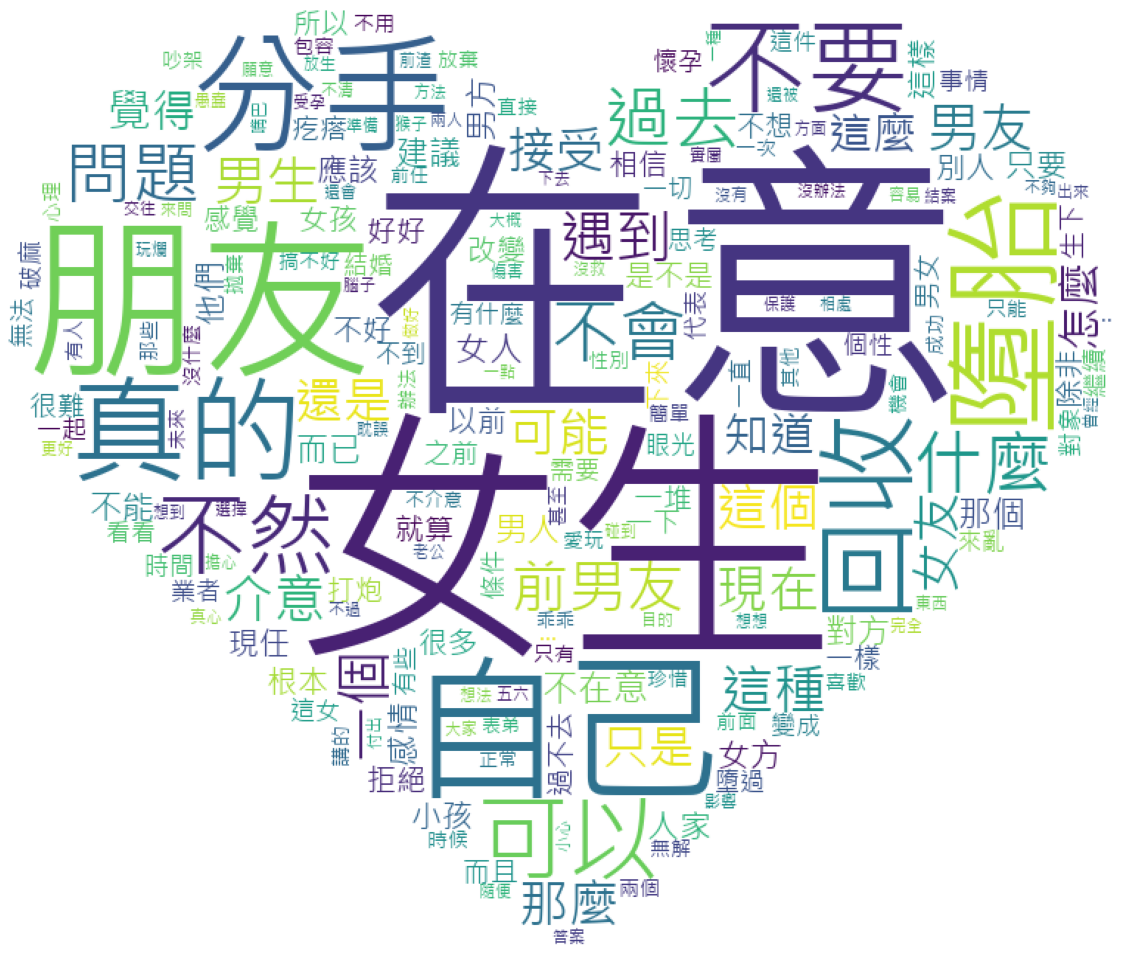

In [49]:
#做成文字雲
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
mask = np.array(Image.open("H.png"))#輸入自己想要的圖案
font = "C:\Windows\Fonts\MSJH.TTC"
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [51]:
df['seg'].to_csv('PTT.csv')